<a href="https://colab.research.google.com/github/worklifesg/Natural-Language-Processing/blob/main/Projects/2.%20Spam%20Ham%20Detection%20Project/Spam_Ham_Detection_and_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3 align='center'>Spam/Ham Detection and Patterns </h3> 

In this program, spam filter for text messages using NLP is performed. 

- Before applying machine learning algorithms to predict whether the text message is spam or not, <b> data pre-processing and exploring data analysis </b> is perfomed using NLP pre-processing techniques.
- <b> Data Pre-processing </b> includes <b> Normalization, removing specific strings </b> such as email addresses, URLs, money symbols, phone numbers and numbers. Also <b> removing puntuations, stop words, and stemming </b> is performed.
- Next <b> feature engineering </b> is done through <b> Tokenization using Ngrams and TF-IDF statistics. </b>
- A robust classifier is built with splitting the data into train and test with <b> 80/20 split ratio </b> . The training model is tested to built with different classification techniques such as <b> SVC, KNN, Naive Bayes, Decision Tree, Logisitic Regression and Random Forest classifiers. </b>



---



---



##### 1. Import Libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split, learning_curve,GridSearchCV,cross_val_score,StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

##### 2. Reading, Preprocessing and Exploring dataset

In [3]:
#reading dataset from SMSSpamCollection.txt
df = pd.read_table('SMSSpamCollection.txt',header=None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Checking dataset information to verify if there is any null text

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
#Renaming the columns '0' and '1' by label and text. In this problem we have two labels (spam and ham)

df = df.rename(columns={0:'Label', 1:'Text'})
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Total number of texts: 5572
Number of Spam Texts: 747
Nubmer of Ham texts: 4825


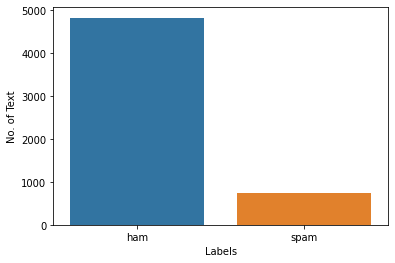

In [16]:
#Checking number of ham and spam texts
print('Total number of texts: {}'.format(df.shape[0]))
print('Number of Spam Texts: {}'.format(df[df.Label=='spam'].shape[0]))
print('Nubmer of Ham texts: {}'.format(df[df.Label=='ham'].shape[0])) 

ax = sns.countplot(df['Label'],label="Labels")
plt.ylabel('No. of Text');
plt.xlabel('Labels');

<b> <i> The given dataset is imbalanced therefore the predicted model can be baised in certain cases </i> </b>

Before jumping to text pre-processing let us explore the data thorugh data visualization (histograms, wordcloud)


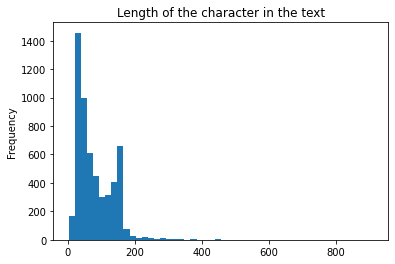

In [41]:
plt.figure(figsize=(6,4))
plt.hist(x=df['Text'].map(lambda x:len(x)), bins=50);
plt.ylabel('Frequency')
plt.title('Length of the character in the text');


In [33]:
#let us check a text of length

df['Length'] = df['Text'].apply(len) #adding Length column in dataframe
print('Max Length: ',df['Length'].max())
df.head()

Max Length:  910


,Label,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
#largest text in dataset
df[df['Length']==910]['Text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [43]:
#Create a word cloud for spam and ham words in a text message
nltk.download('punkt')
#empty list of ham and spam
words_ham = ''
words_spam = ''

#using for loop to check label with spam and ham and use tokenize to convert sentence to words

for i in df[df['Label']=='spam'].Text:
  text = i.lower()
  tokens = nltk.word_tokenize(text)
  for words in tokens:
    words_spam = words_spam + words + ' '

for i in df[df['Label']=='ham'].Text:
  text = i.lower()
  tokens = nltk.word_tokenize(text)
  for words in tokens:
    words_ham = words_ham + words + ' '

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


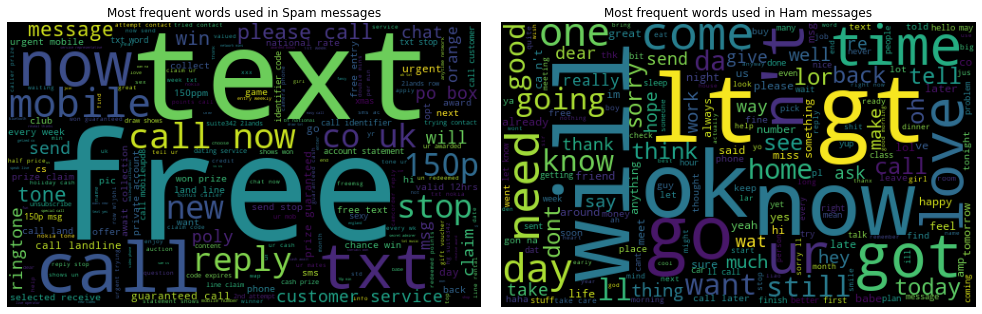

In [53]:
wcloud_spam = WordCloud(width=500,height=300).generate(words_spam)
wcloud_ham = WordCloud(width=500,height=300).generate(words_ham)

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(wcloud_spam)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Most frequent words used in Spam messages');
plt.subplot(122)
plt.imshow(wcloud_ham)
plt.axis('off')
plt.tight_layout(pad=2)
plt.title('Most frequent words used in Ham messages');

In [54]:
# we can replace spam ham by 0,1 by replace or using LabelEncoder

df = df.replace(['ham','spam'],[0,1])
df.head()

,Label,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


<h4 align='center'> .................. To be completed .................. </h4>